<a href="https://colab.research.google.com/github/sonalipriyaa/Google_Colab__python_ML/blob/main/SUPPORT_VECTOR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINEAR SUPPORT VECTOR REGRESSION

In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt; # in svr we have implicit equation

In [33]:
dataset=pd.read_csv('/content/Position_Salaries.csv')
X=dataset.iloc[ :, 1:-1].values
Y=dataset.iloc[ :, -1].values

In [34]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [35]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Feature scaling

In [36]:
# here we need to apply feature scaling to dependent variable Y also because no coefficient here to compensate high value of features because there is implicit relationship between X and Y in equation will also apply feature scaling to Y because its value is not 0 or 1  feature scaling to bring in same range also because values of features that is X is less than that of dependent variable Y so we don not want the vales to be neglected by the model
# so we will now apply feature sacling to both X and Y
# first reshaping Y to make it into a 2D array because standard scaler class needs a 2d array as its input
# with the help of Y calling reshape function which will take input of Y with new shape that it wants to have first will be no of rows of this new Y and then no of col
Y = Y.reshape(len(Y),1) # we want 1 col so 10 rows and 1 col finally
# length of y that is no of salaries present will be my new no of rows
print(Y)


[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [37]:
# now feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() # scaler for matrix of features X
sc_Y = StandardScaler() # object of standard scaler sclass
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)
# fit method will connect obj to features


In [38]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [39]:
print(Y) # -3 to +3

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


TRAINING SVR MODEL ON WHOLE DATASET

In [40]:
# from sklearn get svm module from which we will import svr class
from sklearn.svm import SVR
# creating obj of svr class svr class itself its instance will use rbf kernel as input here
regressor = SVR(kernel='rbf')
#rbf stands for Radial Basis Function kernel, which is a popular kernel used in SVR. It maps input features into a higher-dimensional space where a linear regression can effectively capture the relationship between input features and the target variable.
# now we have the model and now training the regressor on the whole dataset
#fit function will train the model on complete dataset to learn corelations between position level and salaries
regressor.fit(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

PREDICT A NEW RESULT

In [41]:
# predict method will now take scaled value of input let suppose 6.5 because model was trained on scaled value
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))
# predict method will take input as 2d array
# inverse transform method will do reverse scaling
#we want to reverse the scaling of output y

array([[170370.0204065]])

VISUALISING THE SVR RESULTS

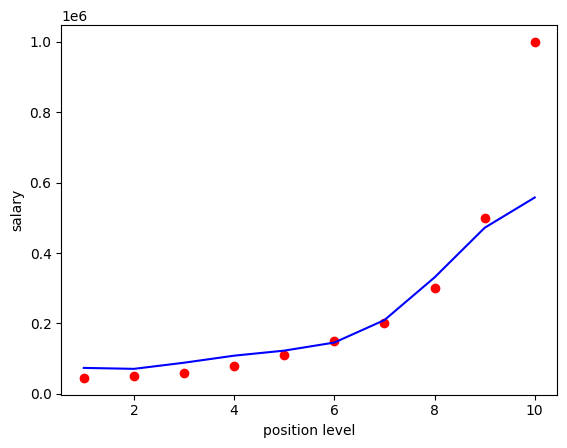

In [42]:
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(Y),color = 'red') # X axis is X and Y axis is Y used to inverse so that original value is there
# now ploting predictions
# y coordinate will be the predicted salaries instead of Y thats why we are using lin_reg
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform(regressor.predict(X).reshape(-1,1)) , color = 'blue') # here second value is actually the prediction
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()


SVR RESULTS IN HIGH RESOLUTIONS

<ipython-input-43-109926cac35e>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


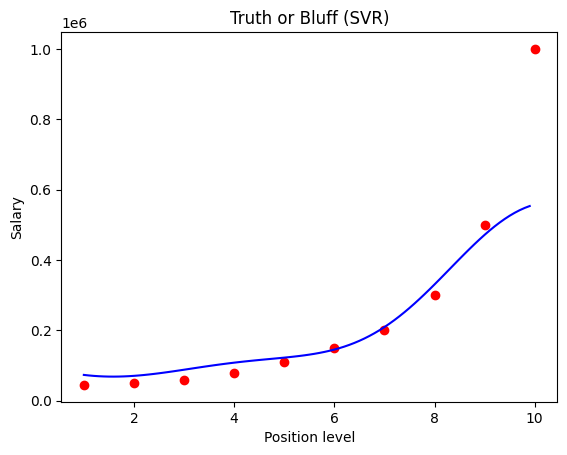

In [43]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red')
plt.plot(X_grid, sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()